In [ ]:
import sys
sys.path.append('../')
from src.compress_sensing_library import *
import pandas as pd

In [35]:
hyperparam_track = data_save_path('tree_part1', 'dct', 'V1', 'test')
hyperparam_track = hyperparam_track.split('.')[0] + '.txt'
rep = 10
alp = [1, 2, 3, 4, 5, 6]
num_cell = [50, 100, 200]
cell_size = [1, 2, 4, 6, 8]
sparse_freq = [1, 2, 4, 6, 8]
search_list = [rep, alp, num_cell, cell_size, sparse_freq]

hyperparam_list = list(zip(search_df.columns, search_list))

f = open(hyperparam_track, "a+")
f.write("nameofFile\n")
for i in hyperparam_list:
    f.write(f"   {i[0]}: {i[1]}\n")
f.write("\n\n")
f.close()

upper triggered: V1


In [15]:
search_df = pd.DataFrame(columns= [ 'rep', 'alp', 'num_cell', 'cell_size', 'sparse_freq'])
search_df.columns[1:]

Index(['alp', 'num_cell', 'cell_size', 'sparse_freq'], dtype='object')

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import *

In [128]:
img_nm = 'tree_part1'
root = search_root()
load_V1 = '{root}/result/dct/{img}/V1/color_param_Wed_Jul_5_11_38_08_2023.csv'.format(root = root, img = img_nm)
load_pixel = '{root}/result/dct/{img}/pixel/color_param_Fri_May_12_16_46_28_2023.csv'.format(root = root, img = img_nm)
load_gaussian = '{root}/result/dct/{img}/gaussian/color_param_Fri_May_12_16_46_08_2023.csv'.format(root = root, img = img_nm)
directory = "num_cell_error"
save = True
data = [load_pixel, load_gaussian, load_V1]

In [129]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [130]:
V1_param_df

,rep,alp,num_cell,cell_size,sparse_freq,error
0,0.0,0.01,50,2.0,2.0,228.220213
1,0.0,0.01,50,2.0,4.0,234.215694
2,0.0,0.01,50,2.0,8.0,237.142126
3,0.0,0.01,50,4.0,2.0,235.737969
4,0.0,0.01,50,4.0,4.0,237.642549
...,...,...,...,...,...,...
2875,19.0,10.00,500,4.0,4.0,39.127470
2876,19.0,10.00,500,4.0,8.0,42.567358
2877,19.0,10.00,500,8.0,2.0,34.810902
2878,19.0,10.00,500,8.0,4.0,40.282599


In [131]:
V1_param_df.loc[V1_param_df['num_cell'] == 50]

,rep,alp,num_cell,cell_size,sparse_freq,error
0,0.0,0.01,50,2.0,2.0,228.220213
1,0.0,0.01,50,2.0,4.0,234.215694
2,0.0,0.01,50,2.0,8.0,237.142126
3,0.0,0.01,50,4.0,2.0,235.737969
4,0.0,0.01,50,4.0,4.0,237.642549
...,...,...,...,...,...,...
2848,19.0,10.00,50,4.0,4.0,48.432163
2849,19.0,10.00,50,4.0,8.0,45.268827
2850,19.0,10.00,50,8.0,2.0,54.511844
2851,19.0,10.00,50,8.0,4.0,45.617845


In [132]:
V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.01) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

,rep,alp,num_cell,cell_size,sparse_freq,error
7,0.0,0.01,50,8.0,4.0,236.573686
151,1.0,0.01,50,8.0,4.0,235.388428
295,2.0,0.01,50,8.0,4.0,238.528598
439,3.0,0.01,50,8.0,4.0,236.753181
583,4.0,0.01,50,8.0,4.0,237.573355
727,5.0,0.01,50,8.0,4.0,234.995007
871,6.0,0.01,50,8.0,4.0,239.360358
1015,7.0,0.01,50,8.0,4.0,239.560037
1159,8.0,0.01,50,8.0,4.0,236.893143
1303,9.0,0.01,50,8.0,4.0,237.412641


In [133]:
temp = V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.01) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

temp2 = V1_param_df.groupby(
    ['num_cell', 'cell_size', 'sparse_freq', 'alp'], as_index=False).mean().drop('rep', axis=1) 
temp2.loc[(temp2['num_cell'] == 50) & (temp2['alp'] == 0.1) & (temp2['cell_size'] == 8) & (temp2['sparse_freq'] == 4)]

,num_cell,cell_size,sparse_freq,alp,error
29,50,8.0,4.0,0.1,213.915133


In [134]:
temp3.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1)

,num_cell,sparse_freq,cell_size,alp,error
0,200,1,1,0.001,125.711718
1,200,1,1,0.010,120.815517
2,200,1,1,0.100,77.745605
3,200,1,1,1.000,46.563879
4,200,1,1,10.000,45.394015
...,...,...,...,...,...
170,200,8,8,0.100,38.769369
171,200,8,8,1.000,42.595263
172,200,8,8,10.000,46.416362
173,200,8,8,100.000,49.882553


In [135]:
temp3 = V1_param_df.loc[V1_param_df['num_cell'] == 200]

# temp3.loc[(temp3['error'] == temp3['error'].min())]
temp50 = temp3.groupby(
    ['num_cell', 'cell_size', 'sparse_freq', 'alp'], as_index=False).mean().drop('rep', axis=1)
num_cell, cell_size, sparse_freq, alpha, error = temp50.loc[(temp50['error'] == temp50['error'].min())].values.squeeze()
num_cell = int(num_cell)
cell_size = int(cell_size)
sparse_freq = int(sparse_freq)

In [136]:
print('minimum parameter')
temp50.loc[(temp50['error'] == temp50['error'].min())]

minimum parameter


,num_cell,cell_size,sparse_freq,alp,error
26,200,8.0,2.0,1.0,34.1229


In [137]:
V1_param_df.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['alp'] == alpha)]

,rep,alp,num_cell,cell_size,sparse_freq,error
96,0.0,1.0,200,8.0,2.0,34.485182
240,1.0,1.0,200,8.0,2.0,33.659504
384,2.0,1.0,200,8.0,2.0,34.404554
528,3.0,1.0,200,8.0,2.0,34.130729
672,4.0,1.0,200,8.0,2.0,33.686958
816,5.0,1.0,200,8.0,2.0,34.810694
960,6.0,1.0,200,8.0,2.0,34.089702
1104,7.0,1.0,200,8.0,2.0,34.045770
1248,8.0,1.0,200,8.0,2.0,34.601236
1392,9.0,1.0,200,8.0,2.0,34.057908


Process Reconstruction on (30, 30, 3) image


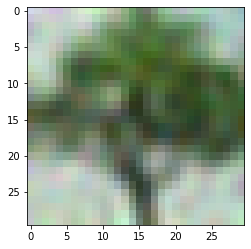

33.538352838371644
Process Reconstruction on (30, 30, 3) image


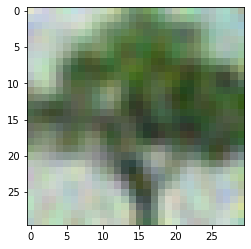

34.28470666508773
Process Reconstruction on (30, 30, 3) image


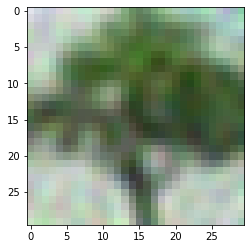

33.93457758033177
Process Reconstruction on (30, 30, 3) image


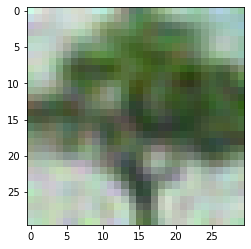

33.95662265629817
Process Reconstruction on (30, 30, 3) image


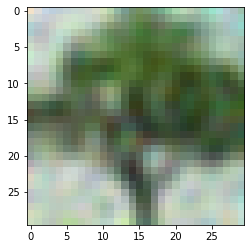

34.184986958215056
Process Reconstruction on (30, 30, 3) image


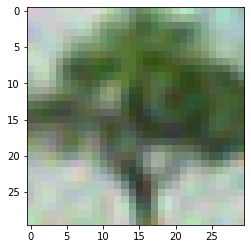

33.913730421631755
Process Reconstruction on (30, 30, 3) image


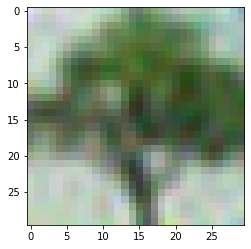

34.15803142909601
Process Reconstruction on (30, 30, 3) image


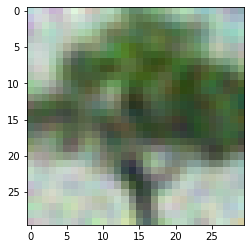

34.33462780731235
Process Reconstruction on (30, 30, 3) image


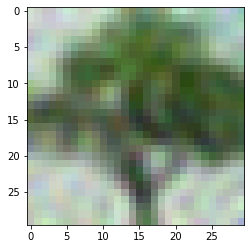

34.06669928243709
Process Reconstruction on (30, 30, 3) image


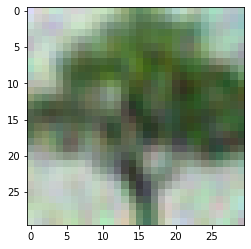

34.121840513079015
Process Reconstruction on (30, 30, 3) image


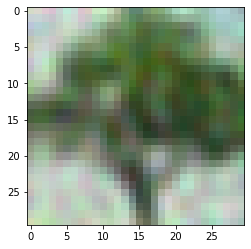

34.129459415584066
Process Reconstruction on (30, 30, 3) image


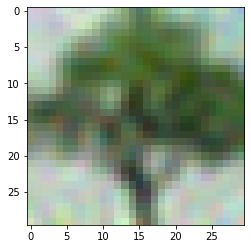

34.404473223372825
Process Reconstruction on (30, 30, 3) image


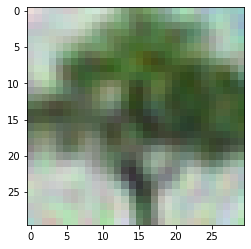

33.57977235049563
Process Reconstruction on (30, 30, 3) image


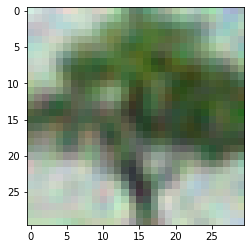

34.000310456098944
Process Reconstruction on (30, 30, 3) image


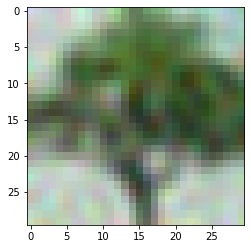

34.61825144823657
Process Reconstruction on (30, 30, 3) image


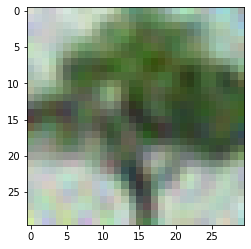

34.082677255299195
Process Reconstruction on (30, 30, 3) image


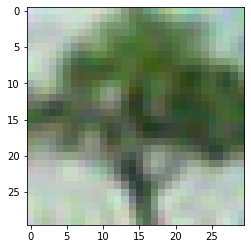

33.72509780893485
Process Reconstruction on (30, 30, 3) image


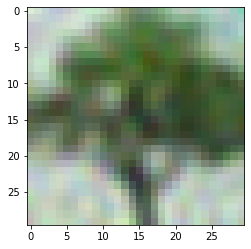

33.97080445846927
Process Reconstruction on (30, 30, 3) image


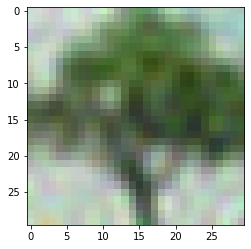

33.87350652714367
Process Reconstruction on (30, 30, 3) image


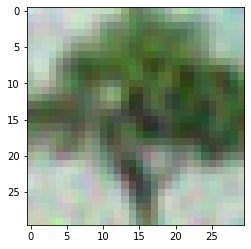

34.73376519245278
34.08061471439742


In [138]:
root = search_root()
img = Image.open(os.path.join(root, "image/tree_part1.jpg"))
img_arr = np.asarray(img)
rep = 20
avg = 0
result=[]
for i in range(0, 20):
    reconst = filter_reconstruct(img_arr, num_cell=num_cell, cell_size = cell_size, sparse_freq=sparse_freq, alpha = alpha, observation = 'V1', mode = 'color')
    error = error_calculation(img_arr, reconst)
    plt.imshow(reconst)
    plt.show()
    print(error)
    avg+=error
    result.append(error)
print(avg/20)


In [139]:
pd.DataFrame(result, columns=['error'])

,error
0,33.538353
1,34.284707
2,33.934578
3,33.956623
4,34.184987
5,33.913730
6,34.158031
7,34.334628
8,34.066699
9,34.121841


In [119]:
error

34.11475348208387

In [120]:
V1_param_df.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['alp'] == alpha)].groupby(['alp', 'num_cell', 'cell_size', 'sparse_freq']).mean()

,,,,rep,error
alp,num_cell,cell_size,sparse_freq,,
1.0,200,6,2,9.5,34.114753
